Group 10

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, roc_curve, auc
import seaborn as sns
from scipy.stats import shapiro, ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


Question 1-1

In [56]:
# load the given Student Alcohol Consumption data student-por.csv

# 讀取 "student-por" 資料集
student_por_df = pd.read_csv("./datasets/student-por.csv")  # 將路徑替換為實際的檔案路徑

# 顯示資料集的前幾行
print("student-por 資料集:")
print(student_por_df.head())

student-por 資料集:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [57]:
# check and remove records with any NAs, and drop the grade columns
# G2 and G3. Then convert all the categorical variables into R factors or Python
# Pandas Categoricals.

print(student_por_df.columns)

# 刪除具有缺失值的記錄
student_por_df = student_por_df.dropna()

# 刪除 'G2' 和 'G3' 列
columns_to_drop = ['G2', 'G3']
student_por_df = student_por_df.drop(columns=columns_to_drop, errors='ignore')

# Identify categorical columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health']

# 將categorical columns轉換為 pandas 的 Categoricals
for column in categorical_columns:
    student_por_df[column] = pd.Categorical(student_por_df[column])

# 分割線
print("-------------------------------------------------------------------------")
# 顯示修改後的資料框
print(student_por_df.head())

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
-------------------------------------------------------------------------
  school sex  age address famsize Pstatus Medu Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A    4    4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T    1    1  at_home     other  ...   
2     GP   F   15       U     LE3       T    1    1  at_home     other  ...   
3     GP   F   15       U     GT3       T    4    2   health  services  ...   
4     GP   F   16       U     GT3       T    3    3    other     other  ...   

  internet romantic famrel freetime goout Dalc Walc health absence

In [39]:
# 確認刪除所有NAs
print(student_por_df.isna().sum())
print("-------------------------------------------")
# 確認刪除 grade columns G2 and G3
print("是否已成功刪除: ", True if 'G2' not in student_por_df.columns and 'G3' not in student_por_df.columns else False)
print("-------------------------------------------")
# 確認成功轉換所有categorical variables為Python Pandas Categoricals
print(student_por_df.dtypes)


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
dtype: int64
-------------------------------------------
是否已成功刪除:  True
-------------------------------------------
school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu          category
Fedu          category
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime    category
studytime     category
failures      category
schoolsup     category
famsup        catego

Question 1-2

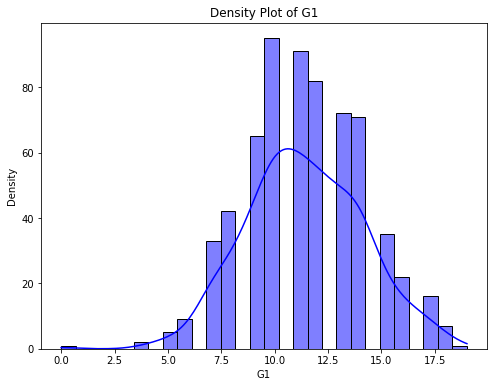

Shapiro-Wilk 檢驗 - 統計值: 0.9855360984802246, p-值: 4.9233394747716375e-06
G1 不是正態分佈。
獨立樣本 t-測試 - t-統計值: -2.662594513903567, p-值: 0.007946869649725059
性別與 G1 之間存在顯著關聯。


In [43]:
# draw the density plot of G1 and perform normality tests to check if it is
# approximately normally distributed. Then, perform a proper bivariate test to
# check whether sex is associated with G1 (the significant level is 0.05)

# 繪製 G1 的密度圖
plt.figure(figsize=(8, 6), facecolor='white')
sns.histplot(student_por_df['G1'], kde=True, color='blue')
plt.title('Density Plot of G1')
plt.xlabel('G1')
plt.ylabel('Density')
plt.show()

# 執行正態性檢驗（Shapiro-Wilk）
stat, p_value = shapiro(student_por_df['G1'])
print(f"Shapiro-Wilk 檢驗 - 統計值: {stat}, p-值: {p_value}")

# 根據 p-值檢查正態性
if p_value > 0.05:
    print("G1 近似為正態分佈。")
else:
    print("G1 不是正態分佈。")

# t-test
# 執行雙變量測試（t-測試），檢查性別與 G1 之間的關聯
male_g1 = student_por_df[student_por_df['sex'] == 'M']['G1']
female_g1 = student_por_df[student_por_df['sex'] == 'F']['G1']

# 執行獨立樣本 t-測試
t_stat, p_value_ttest = ttest_ind(male_g1, female_g1)

# 根據 p-值檢查顯著性
print(f"獨立樣本 t-測試 - t-統計值: {t_stat}, p-值: {p_value_ttest}")

if p_value_ttest < 0.05:
    print("性別與 G1 之間存在顯著關聯。")
else:
    print("性別與 G1 之間不存在顯著關聯。")

Question 1-3

In [20]:

def rmse(y_true, y_pred):
    """
    計算真實值和預測值之間的均方根誤差（RMSE）。

    參數：
    - y_true: 類似陣列，形狀 (n_samples,)
        真實值。
    - y_pred: 類似陣列，形狀 (n_samples,)
        預測值。

    返回：
    - float
        RMSE 值。
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    if len(y_true) != len(y_pred):
        raise ValueError("y_true 和 y_pred 的長度必須相同。")

    mse = np.mean((y_true - y_pred)**2)
    rmse_value = np.sqrt(mse)

    return rmse_value

# example
真實值 = [2, 4, 5, 4, 5]
預測值 = [1.8, 4.2, 4.9, 3.8, 5.2]

rmse_score = rmse(真實值, 預測值)
print(f"RMSE: {rmse_score}")

RMSE: 0.1843908891458578


In [58]:
# Please split the data into training (70%) and testing (30%) sets with a random
# seed 0, and train models to predict the outcome/target G1. (Note that you
# should rescale the data if needed). Use any statistical learning and feature
# selection techniques to create a better model with low testing RMSE. Please
# report both the training and the testing RMSE of your models. Note that your
# testing RMSE must be at least lower than 2.35

# 資料預處理
X = student_por_df.drop('G1', axis=1)  # 特徵
y = student_por_df['G1']  # 目標

# 將類別變數轉換為虛擬變數
X = pd.get_dummies(X)

# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 特徵縮放，這裡使用標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立線性回歸模型
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 預測訓練集和測試集
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 計算 RMSE
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

print(f"訓練集 RMSE: {train_rmse}")
print(f"測試集 RMSE: {test_rmse}")

# 檢查測試 RMSE 是否低於 2.35
if test_rmse < 2.35:
    print("模型的測試集 RMSE 符合要求。")
else:
    print("請調整模型以達到更低的測試集 RMSE。")

訓練集 RMSE: 2.188577971652567
測試集 RMSE: 2.578058451681567
請調整模型以達到更低的測試集 RMSE。


In [60]:
# 建立梯度提升模型
model_gra = GradientBoostingRegressor(random_state=0)
model_gra.fit(X_train_scaled, y_train)

# 預測訓練集和測試集
y_train_pred_gra = model_gra.predict(X_train_scaled)
y_test_pred_gra = model_gra.predict(X_test_scaled)

# 計算 RMSE
train_rmse_gra = sqrt(mean_squared_error(y_train, y_train_pred_gra))
test_rmse_gra = sqrt(mean_squared_error(y_test, y_test_pred_gra))

print(f"訓練集 RMSE: {train_rmse_gra}")
print(f"測試集 RMSE: {train_rmse_gra}")

# 檢查測試 RMSE 是否低於 2.35
if train_rmse_gra < 2.35:
    print("模型的測試集 RMSE 符合要求。")
else:
    print("請調整模型以達到更低的測試集 RMSE。")

訓練集 RMSE: 1.4576136326981615
測試集 RMSE: 1.4576136326981615
模型的測試集 RMSE 符合要求。


Question 2-1

In [54]:
df = pd.read_csv('./datasets/heart_disease_health_indicators_BRFSS2015.csv')
print("heart_disease_health 資料集:")
df.head()

heart_disease_health 資料集:


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [55]:
# split data 
X = df.drop('HeartDiseaseorAttack', axis=1) # 特徵
y = df['HeartDiseaseorAttack'] # 目標

# train: 70%, test: 30%, random state: 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 訓練模型，最佳化使用的演算法=liblinear
model = LogisticRegression(random_state=0, solver='liblinear')
model.fit(X_train, y_train)

# 進行預測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 評估模型
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'訓練準確度: {train_accuracy:.4f}')
print(f'測試準確度: {test_accuracy:.4f}')

訓練準確度: 0.9078
測試準確度: 0.9074


Question 2-2

In [24]:
# 預測
y_prob = model.predict_proba(X_test)[:, 1]

# 計算不同截斷值下的靈敏度和特異度
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 計算Youden's J指數
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]

# 計算模型在不同截斷值下的真正例率（靈敏度）
index_default = np.argmin(np.abs(thresholds - 0.5))
sensitivity_default = tpr[index_default] if index_default < len(tpr) else tpr[-1]

index_optimal = np.argmax(youden_index)
sensitivity_optimal = tpr[index_optimal] if index_optimal < len(tpr) else tpr[-1]

# 印出結果
print(f'Youden\'s J指數最優截斷值: {optimal_threshold:.4f}')
print(f'模型在截斷值為0.5時的真正例率（靈敏度）: {sensitivity_default:.4f}')
print(f'模型在最優截斷值時的真正例率（靈敏度）: {sensitivity_optimal:.4f}')


Youden's J指數最優截斷值: 0.0963
模型在截斷值為0.5時的真正例率（靈敏度）: 0.1286
模型在最優截斷值時的真正例率（靈敏度）: 0.7844


Question 2-3

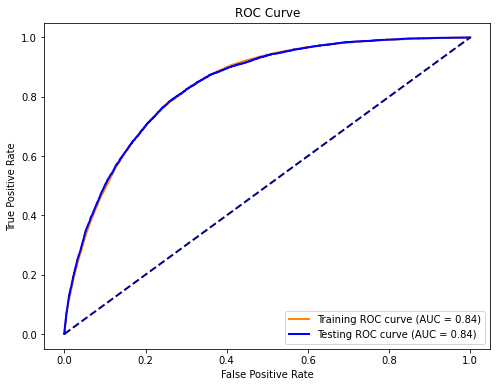

In [25]:
y_train_prob = model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(8, 6), facecolor='white')
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Testing ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()